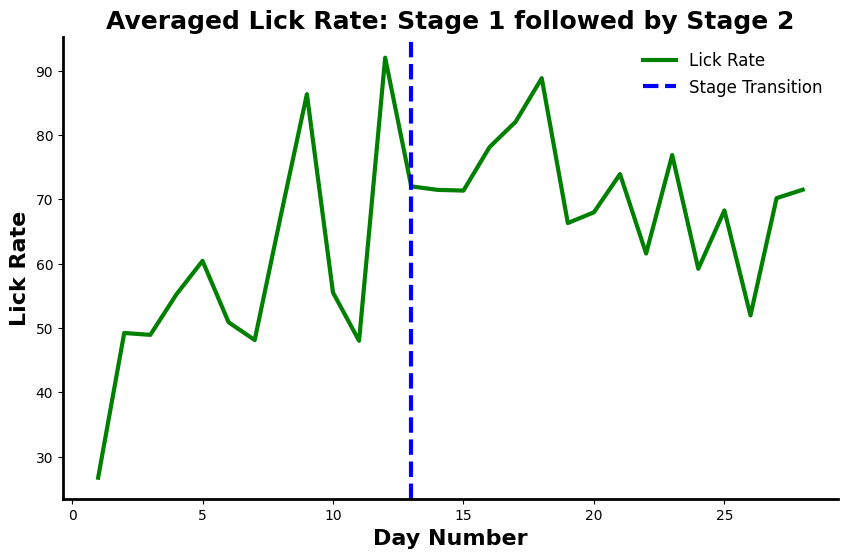

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory containing the CSV files
directory = 'X:/RaymondLab/1_Kai/3_processed_data/7_lick_rate_csv/averaged'

# List all files in the directory
all_files = os.listdir(directory)

# Filter for stage 1 and stage 2 files based on the filenames
stage1_files = [os.path.join(directory, f) for f in all_files if 'stage1' in f]
stage2_files = [os.path.join(directory, f) for f in all_files if 'stage2' in f]

# Load and average stage 1 data
stage1_dfs = [pd.read_csv(file) for file in stage1_files]
stage1_concat = pd.concat(stage1_dfs).groupby('day_number', as_index=False).mean()

# Load and average stage 2 data
stage2_dfs = [pd.read_csv(file) for file in stage2_files]
stage2_concat = pd.concat(stage2_dfs).groupby('day_number', as_index=False).mean()

# Adjust stage 2 day numbers to continue from where stage 1 ended
max_stage1_day = stage1_concat['day_number'].max()
stage2_concat['day_number'] += max_stage1_day

# Concatenate stage 1 and stage 2 data
combined_data = pd.concat([stage1_concat, stage2_concat])

# Plotting
plt.figure(figsize=(10,6))
plt.plot(combined_data['day_number'], combined_data['total'], label='Lick Rate', color='green', lw=3)

# Customize the plot appearance
plt.axvline(x=max_stage1_day, color='b', linestyle='--', lw=3, label='Stage Transition')

plt.xlabel('Day Number', fontsize=16, fontweight='bold')
plt.ylabel('Lick Rate', fontsize=16, fontweight='bold')
plt.title('Averaged Lick Rate: Stage 1 followed by Stage 2', fontsize=18, fontweight='bold')

# Removing the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the x and y axis spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Disable grid lines
ax.grid(False)

# Make the legend label thicker and without a frame
plt.legend(frameon=False, fontsize=12, loc='best')

plt.show()


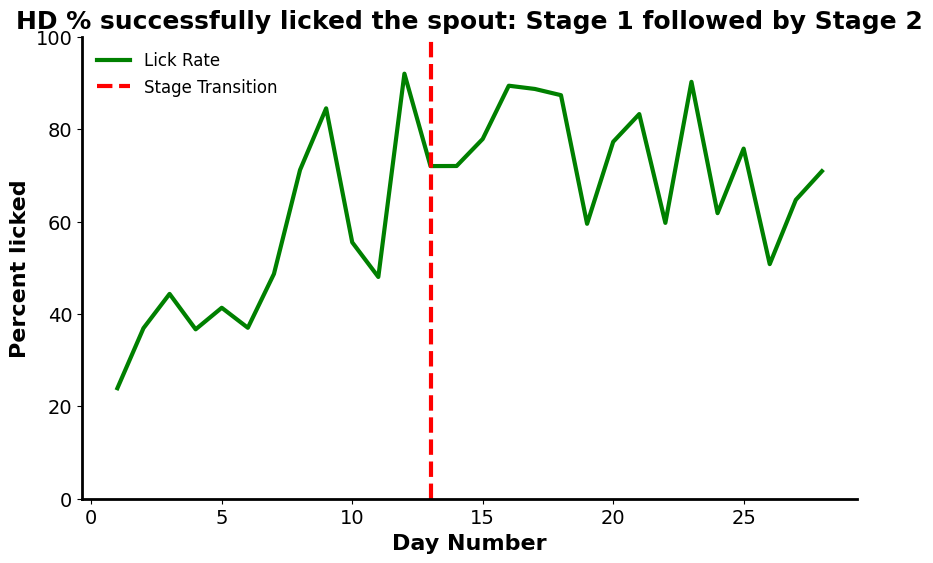

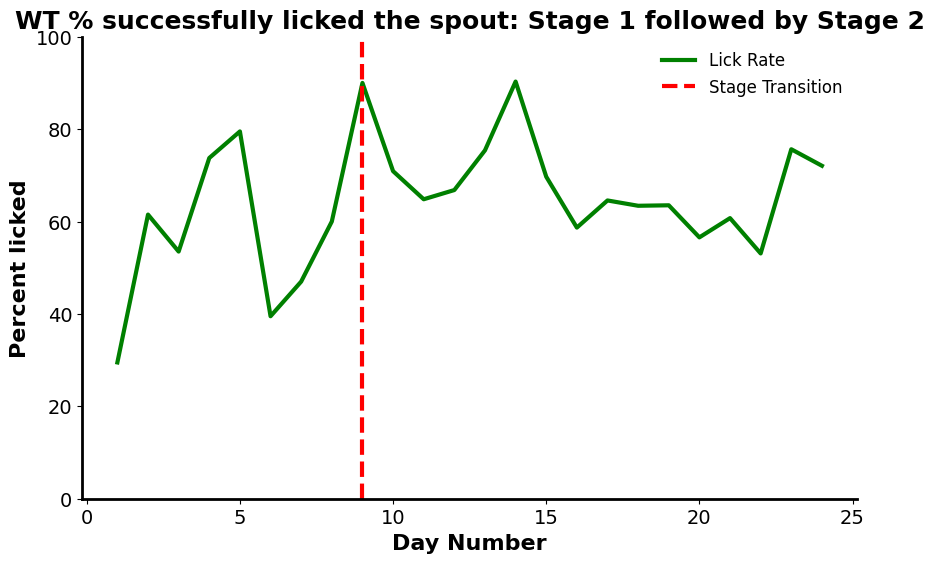

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory containing the CSV files
directory = 'X:/RaymondLab/1_Kai/3_processed_data/7_lick_rate_csv/averaged'

# List all files in the directory
all_files = os.listdir(directory)

# Filter for stage 1 and stage 2 files based on the filenames and split by "HD" and "WT"
stage1_HD_files = [os.path.join(directory, f) for f in all_files if 'stage1' in f and 'HD' in f]
stage2_HD_files = [os.path.join(directory, f) for f in all_files if 'stage2' in f and 'HD' in f]
stage1_WT_files = [os.path.join(directory, f) for f in all_files if 'stage1' in f and 'WT' in f]
stage2_WT_files = [os.path.join(directory, f) for f in all_files if 'stage2' in f and 'WT' in f]

def plot_data(stage1_files, stage2_files, title):
    # Load and average stage 1 data
    stage1_dfs = [pd.read_csv(file) for file in stage1_files]
    stage1_concat = pd.concat(stage1_dfs).groupby('day_number', as_index=False).mean()

    # Load and average stage 2 data
    stage2_dfs = [pd.read_csv(file) for file in stage2_files]
    stage2_concat = pd.concat(stage2_dfs).groupby('day_number', as_index=False).mean()

    # Adjust stage 2 day numbers to continue from where stage 1 ended
    max_stage1_day = stage1_concat['day_number'].max()
    stage2_concat['day_number'] += max_stage1_day

    # Concatenate stage 1 and stage 2 data
    combined_data = pd.concat([stage1_concat, stage2_concat])

    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(combined_data['day_number'], combined_data['total'], label='Lick Rate', color='green', lw=3)

    # Customize the plot appearance
    plt.axvline(x=max_stage1_day, color='red', linestyle='--', lw=3, label='Stage Transition')

    plt.xlabel('Day Number', fontsize=16, fontweight='bold')
    plt.ylabel('Percent licked', fontsize=16, fontweight='bold')
    plt.title(title, fontsize=18, fontweight='bold')

    # Set y-axis limits to be between 0 and 100
    plt.ylim(0, 100)

    # Removing the top and right spines
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Make the x and y axis spines thicker
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

    # Increase size of x and y axis numbers
    ax.tick_params(axis='both', labelsize=14)

    # Disable grid lines
    ax.grid(False)

    # Make the legend label thicker and without a frame
    plt.legend(frameon=False, fontsize=12, loc='best')

    plt.show()

# Plot for HD files
plot_data(stage1_HD_files, stage2_HD_files, title='HD % successfully licked the spout: Stage 1 followed by Stage 2')

# Plot for WT files
plot_data(stage1_WT_files, stage2_WT_files, title='WT % successfully licked the spout: Stage 1 followed by Stage 2')
